In [ ]:
# import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random as rd
from math import sqrt

# membuat warning filter
import warnings
warnings.filterwarnings('ignore')

# membuat datafrane
df = pd.read_csv('sample_data/clustering.csv')
print(df)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001003    Male     Yes          1      Graduate            No   
1    LP001005    Male     Yes          0      Graduate           Yes   
2    LP001006    Male     Yes          0  Not Graduate            No   
3    LP001008    Male      No          0      Graduate            No   
4    LP001013    Male     Yes          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
376  LP002953    Male     Yes         3+      Graduate            No   
377  LP002974    Male     Yes          0      Graduate            No   
378  LP002978  Female      No          0      Graduate            No   
379  LP002979    Male     Yes         3+      Graduate            No   
380  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               4583             1508.0       128.0           

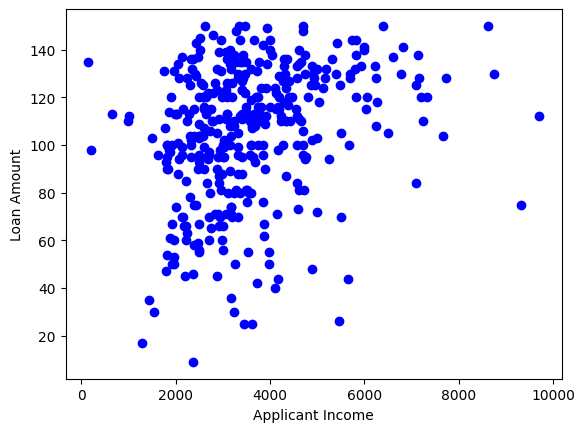

In [ ]:
# menampilkan plot data
X= df[["ApplicantIncome", "LoanAmount"]]
# memvisualisasikan data point
plt.scatter (X["ApplicantIncome"], X["LoanAmount"], c="blue")
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

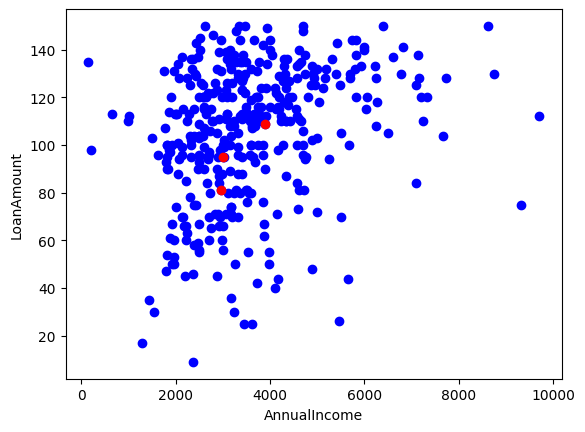

     ApplicantIncome  LoanAmount
80              2957        81.0
227             3013        95.0
252             3902       109.0


In [ ]:
# membuat algoritma Kmeans

# menentukan nomor centroid
K=3

# memilih observasi acak sebagai centroid
Centroids = (X.sample(n=K))
plt.scatter(X["ApplicantIncome"], X["LoanAmount"], c="blue")

# menentukan titik centroid
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c="red")
plt.xlabel("AnnualIncome")
plt.ylabel("LoanAmount")
plt.show()

# menampilkan centroid
print(Centroids)

In [ ]:
# menetapkan semua poin yang dekat dengan cluster centroid
diff = 1
j = 0

while(diff !=0):
  XD = X
  i = 1
  for index1, row_c in Centroids.iterrows():
    ED = []
    for index2, row_d, in XD.iterrows():
      d1 = (row_c["ApplicantIncome"]-row_d["ApplicantIncome"])**2
      d2 = (row_c["LoanAmount"]-row_d["LoanAmount"])**2
      d = sqrt(d1+d2)
      ED.append(d)
    X[i] = ED
    i = i+1

In [ ]:
# menghitung ulang centroid kepada centroid terbaru
C = []
for index, row in X.iterrows():
  min_dist = row[1]
  pos = 1
  for i in range(K):
    if row[i+1] < min_dist:
      min_dist = row[i+1]
      pos = i+1
  C.append(pos)
X["Clusters"] = C
Centroids_new = X.groupby(["Clusters"]).mean()[["LoanAmount", "ApplicantIncome"]]
if j == 0:
  diff = 1
  j = j+1
else:
  diff = (Centroids_new['LoanAmount'])-Centroids['LoanAmount'].sum()+(Centroids_new['ApplicantIncome'])-Centroids['ApplicantIncome'].sum()
  print(diff.sum())
Centroids = X.groupby(["Clusters"]).mean()[["LoanAmounot", "AppliedIncome"]]

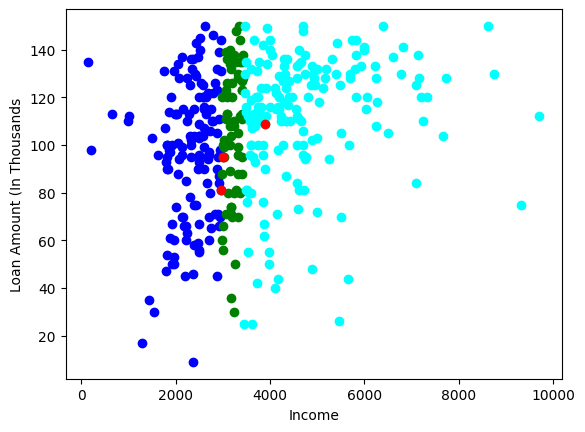

In [16]:
# membuat plot
color = ['blue', 'green', 'cyan']
for k in range (K):
  data = X[X["Clusters"]==k+1]
  plt.scatter(data["ApplicantIncome"], data["LoanAmount"], c=color[k])
plt.scatter(Centroids["ApplicantIncome"], Centroids["LoanAmount"], c='red')
plt.xlabel('Income')
plt.ylabel('Loan Amount (In Thousands')
plt.show()